# Cricket Player Performance Prediction

## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
wc_players = pd.read_csv('/content/drive/MyDrive/Internship/Internsavy/Cricket Player Performance/Dataset/WC_players.csv')
batsman_data = pd.read_csv('/content/drive/MyDrive/Internship/Internsavy/Cricket Player Performance/Dataset/Batsman_Data.csv')
bowler_data = pd.read_csv('/content/drive/MyDrive/Internship/Internsavy/Cricket Player Performance/Dataset/Bowler_data.csv')
ground_averages = pd.read_csv('/content/drive/MyDrive/Internship/Internsavy/Cricket Player Performance/Dataset/Ground_Averages.csv')
odi_result = pd.read_csv('/content/drive/MyDrive/Internship/Internsavy/Cricket Player Performance/Dataset/ODI_Match_Results.csv')
odi_score = pd.read_csv('/content/drive/MyDrive/Internship/Internsavy/Cricket Player Performance/Dataset/ODI_Match_Totals.csv')

In [3]:
wc_players.head()

,Player,ID,Country
0,Gulbadin Naib (c),352048,Afghanistan
1,Rashid Khan (vc),793463,Afghanistan
2,Aftab Alam,440963,Afghanistan
3,Asghar Afghan,320652,Afghanistan
4,Dawlat Zadran,516561,Afghanistan


In [4]:
batsman_data.sample(5)

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
5457,5458,39,39,65,60.00,1,2,v England,Dharamsala,27 Jan 2013,ODI # 3329,Ravindra Jadeja,234675
9677,9678,1*,1,5,20.00,0,0,v South Africa,Sydney,23 Nov 2014,ODI # 3551,Mitchell Starc,311592
632,633,27,27,38,71.05,4,0,v India,Jodhpur,21 Nov 2002,ODI # 1898,Chris Gayle,51880
10138,10139,3,3,9,33.33,0,0,v India,Delhi,13 Mar 2019,ODI # 4113,Alex Carey,326434
10529,10530,32,32,50,64.00,2,0,v Hong Kong,Bulawayo,8 Mar 2018,ODI # 3990,Najibullah Zadran,524049


In [5]:
bowler_data.sample(5)

,Unnamed: 0,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Start Date,Match_ID,Bowler,Player_ID
1453,1454,7.0,0,69,0,9.85,-,-,v New Zealand,Mount Maunganui,5 Jan 2019,ODI # 4075,Thisara Perera,233514
6410,6411,-,-,-,-,-,-,-,v South Africa,The Oval,11 Jun 2017,ODI # 3886,Shikhar Dhawan,28235
4451,4452,10.0,0,38,1,3.80,38.00,60.0,v India,Pune,25 Oct 2017,ODI # 3931,Mitchell Santner,502714
10079,10080,10.0,0,48,4,4.80,12.00,15.0,v South Africa,Perth,14 Nov 2014,ODI # 3545,Nathan Coulter-Nile,261354
8274,8275,8.0,0,60,0,7.50,-,-,v Scotland,Nelson,5 Mar 2015,ODI # 3624,Rubel Hossain,300619


In [6]:
ground_averages.head()

,Ground,Span,Mat,Won,Tied,NR,Runs,Wkts,Balls,Ave,RPO
0,"Eden Gardens, Kolkata - India",2013-2017,4,4,0,0,2161,72,2297,30.01,5.64
1,"Feroz Shah Kotla, Delhi - India",2013-2019,4,4,0,0,1789,75,2331,23.85,4.60
2,Melbourne Cricket Ground - Australia,2013-2019,15,15,0,0,7656,217,8482,35.28,5.41
3,"Saurashtra Cricket Association Stadium, Rajkot...",2013-2015,2,2,0,0,1163,26,1200,44.73,5.81
4,Adelaide Oval - Australia,2013-2019,10,10,0,0,4863,157,5645,30.97,5.16


In [7]:
odi_result.head()

,Unnamed: 0,Result,Margin,BR,Toss,Bat,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
0,418,won,85 runs,NaN,lost,1st,v India,Kolkata,3 Jan 2013,ODI # 3315,Pakistan,7
1,692,lost,85 runs,NaN,won,2nd,v Pakistan,Kolkata,3 Jan 2013,ODI # 3315,India,6
2,419,lost,10 runs,NaN,lost,2nd,v India,Delhi,6 Jan 2013,ODI # 3316,Pakistan,7
3,693,won,10 runs,NaN,won,1st,v Pakistan,Delhi,6 Jan 2013,ODI # 3316,India,6
4,121,lost,107 runs,NaN,lost,2nd,v Australia,Melbourne,11 Jan 2013,ODI # 3317,SriLanka,8


In [8]:
odi_score.head()

,Unnamed: 0,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
0,412,250,48.3,5.15,NaN,1,won,v India,Kolkata,3 Jan 2013,ODI # 3315,Pakistan,7
1,680,165,48.0,3.43,251.0,2,lost,v Pakistan,Kolkata,3 Jan 2013,ODI # 3315,India,6
2,413,157,48.5,3.21,168.0,2,lost,v India,Delhi,6 Jan 2013,ODI # 3316,Pakistan,7
3,681,167,43.4,3.82,NaN,1,won,v Pakistan,Delhi,6 Jan 2013,ODI # 3316,India,6
4,117,198,40.0,4.95,306.0,2,lost,v Australia,Melbourne,11 Jan 2013,ODI # 3317,SriLanka,8


In [9]:
odi_score['Scores_ID'] = odi_score['Unnamed: 0']
odi_score.drop('Unnamed: 0', axis=1)

,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Start Date,Match_ID,Country,Country_ID,Scores_ID
0,250,48.3,5.15,NaN,1,won,v India,Kolkata,3 Jan 2013,ODI # 3315,Pakistan,7,412
1,165,48.0,3.43,251.0,2,lost,v Pakistan,Kolkata,3 Jan 2013,ODI # 3315,India,6,680
2,157,48.5,3.21,168.0,2,lost,v India,Delhi,6 Jan 2013,ODI # 3316,Pakistan,7,413
3,167,43.4,3.82,NaN,1,won,v Pakistan,Delhi,6 Jan 2013,ODI # 3316,India,6,681
4,198,40.0,4.95,306.0,2,lost,v Australia,Melbourne,11 Jan 2013,ODI # 3317,SriLanka,8,117
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,340/7,50.0,6.80,NaN,1,lost,v England,Nottingham,17 May 2019,ODI # 4138,Pakistan,7,549
1292,341/7,49.3,6.88,341.0,2,won,v Pakistan,Nottingham,17 May 2019,ODI # 4138,England,1,979
1293,120/8,33.0,3.63,211.0,2,-,v Ireland,Belfast,19 May 2019,ODI # 4139,Afghanistan,40,1296
1294,193/6,31.5,6.06,352.0,2,-,v England,Leeds,19 May 2019,ODI # 4140,Pakistan,7,550


In [10]:
WC_venue_pitches = ["The Oval, London","Trent Bridge, Nottingham","Sophia Gardens, Cardiff","County Ground, Bristol","Rose Bowl, Southampton","County Ground, Taunton","Old Trafford, Manchester","Edgbaston, Birmingham","Headingley, Leeds","Lord's, London","Riverside Ground, Chester-le-Street"]

In [11]:
#Total Grounds
WC_Ground_Stats = []
ODI_Grounds = odi_score.Ground
for i in ODI_Grounds:
    for j in WC_venue_pitches:
        if i in j:
            #print("i ; ",i,"--j : ",j)
            WC_Ground_Stats.append((i,j))


In [16]:
WC_Ground_Stats[:10]

[("Lord's", "Lord's, London"),
 ("Lord's", "Lord's, London"),
 ('Southampton', 'Rose Bowl, Southampton'),
 ('Southampton', 'Rose Bowl, Southampton'),
 ('Nottingham', 'Trent Bridge, Nottingham'),
 ('Nottingham', 'Trent Bridge, Nottingham'),
 ('Cardiff', 'Sophia Gardens, Cardiff'),
 ('Cardiff', 'Sophia Gardens, Cardiff'),
 ('The Oval', 'The Oval, London'),
 ('The Oval', 'The Oval, London')]

In [12]:
Ground_names = dict(set(WC_Ground_Stats))
def Full_Ground_names(value):
    return Ground_names[value]
Ground_names

{'The Oval': 'The Oval, London',
 'Bristol': 'County Ground, Bristol',
 'Leeds': 'Headingley, Leeds',
 'Chester-le-Street': 'Riverside Ground, Chester-le-Street',
 'Manchester': 'Old Trafford, Manchester',
 'Nottingham': 'Trent Bridge, Nottingham',
 'Southampton': 'Rose Bowl, Southampton',
 "Lord's": "Lord's, London",
 'Birmingham': 'Edgbaston, Birmingham',
 'Cardiff': 'Sophia Gardens, Cardiff'}

In [18]:
#Let's gather the data of all ODI's in these WC Venues
WC_Grounds_History = odi_score[odi_score.Ground.isin([Ground[0] for Ground in WC_Ground_Stats])]
WC_Grounds_History["Ground"] = WC_Grounds_History.Ground.apply(Full_Ground_names)
WC_Grounds_History.head()

<ipython-input-18-53951de044a7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WC_Grounds_History["Ground"] = WC_Grounds_History.Ground.apply(Full_Ground_names)


,Unnamed: 0,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Start Date,Match_ID,Country,Country_ID,Scores_ID
74,557,231/5,46.5,4.93,228.0,2,won,v England,"Lord's, London",31 May 2013,ODI # 3360,Newzealad,5,557
75,844,227/9,50.0,4.54,NaN,1,lost,v New Zealand,"Lord's, London",31 May 2013,ODI # 3360,England,1,844
76,558,359/3,50.0,7.18,NaN,1,won,v England,"Rose Bowl, Southampton",2 Jun 2013,ODI # 3361,Newzealad,5,558
77,845,273,44.1,6.18,360.0,2,lost,v New Zealand,"Rose Bowl, Southampton",2 Jun 2013,ODI # 3361,England,1,845
78,559,253,46.3,5.44,288.0,2,lost,v England,"Trent Bridge, Nottingham",5 Jun 2013,ODI # 3362,Newzealad,5,559


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'England'),
  Text(1, 0, 'Australia'),
  Text(2, 0, 'Pakistan'),
  Text(3, 0, 'India'),
  Text(4, 0, 'SriLanka'),
  Text(5, 0, 'Newzealad'),
  Text(6, 0, 'SouthAfrica'),
  Text(7, 0, 'WestIndies'),
  Text(8, 0, 'Bangladesh')])

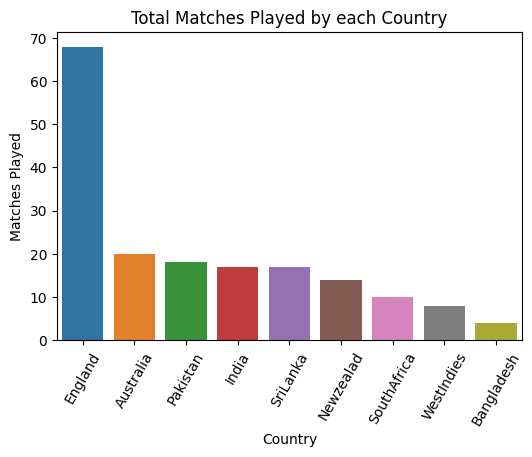

In [20]:
Team_Matches = WC_Grounds_History.Country.value_counts().reset_index()
plt.figure(figsize=(6,4))
sns.barplot(x = "index", y = "Country", data = Team_Matches).set_title("Total Matches Played by each Country")
plt.xlabel("Country")
plt.ylabel("Matches Played")
plt.xticks(rotation = 60)

In [23]:
WC_Grounds_History = WC_Grounds_History.drop('Unnamed: 0', axis=1)

In [24]:
WC_Grounds_History.sample(5)

,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Start Date,Match_ID,Country,Country_ID,Scores_ID
345,212/1,30.3,6.95,207.0,2,won,v England,"Edgbaston, Birmingham",2 Sep 2014,ODI # 3523,India,6,728
900,319/3,48.0,6.64,NaN,1,won,v Pakistan,"Edgbaston, Birmingham",4 Jun 2017,ODI # 3878,India,6,777
1094,268,49.5,5.37,NaN,1,lost,v India,"Trent Bridge, Nottingham",12 Jul 2018,ODI # 4014,England,1,962
89,167,45.0,3.71,235.0,2,lost,v South Africa,"Edgbaston, Birmingham",10 Jun 2013,ODI # 3367,Pakistan,7,423
1097,322/7,50.0,6.44,NaN,1,won,v India,"Lord's, London",14 Jul 2018,ODI # 4016,England,1,963


In [27]:
WC_Grounds_History['Result'].value_counts()

won     79
lost    77
n/r     14
tied     4
-        2
Name: Result, dtype: int64

In [28]:
WC_Grounds_History = WC_Grounds_History[~WC_Grounds_History.Result.isin(['-'])]

In [29]:
WC_Grounds_History['Result'].value_counts()

won     79
lost    77
n/r     14
tied     4
Name: Result, dtype: int64

In [30]:
winnings = WC_Grounds_History[["Country","Result"]]
winnings["count"] = 1
Ground_Results_Per_Team = winnings.groupby(["Country","Result"]).aggregate(["sum"])
Ground_Results_Per_Team = Ground_Results_Per_Team.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()
Ground_Results_Per_Team.columns = ["Country","Result","Count"]
Ground_Results_Per_Team.head()

<ipython-input-30-f9c16b3c758f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winnings["count"] = 1
<ipython-input-30-f9c16b3c758f>:4: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  Ground_Results_Per_Team = Ground_Results_Per_Team.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()


,Country,Result,Count
0,Australia,lost,55.0
1,Australia,n/r,20.0
2,Australia,won,25.0
3,Bangladesh,lost,50.0
4,Bangladesh,n/r,25.0


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Australia'),
  Text(1, 0, 'Bangladesh'),
  Text(2, 0, 'England'),
  Text(3, 0, 'India'),
  Text(4, 0, 'Newzealad'),
  Text(5, 0, 'Pakistan'),
  Text(6, 0, 'SouthAfrica'),
  Text(7, 0, 'SriLanka'),
  Text(8, 0, 'WestIndies')])

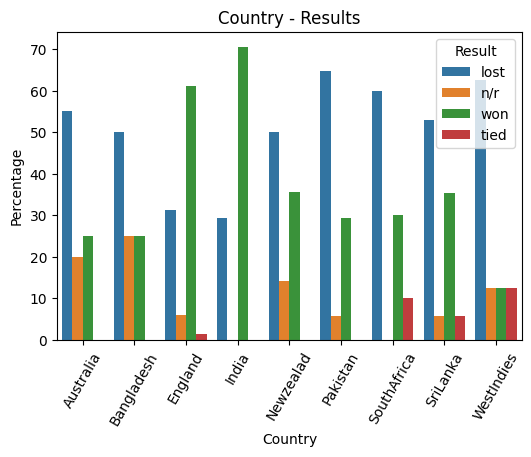

In [31]:
plt.figure(figsize=(6,4))
sns.barplot(x = "Country", y = "Count", hue = "Result", data = Ground_Results_Per_Team)
plt.ylabel("Percentage")
plt.title("Country - Results")
plt.xticks(rotation = 60)

(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5]),
 [Text(0, 0.0, '0.0'),
  Text(0, 0.5, '0.5'),
  Text(0, 1.0, '1.0'),
  Text(0, 1.5, '1.5'),
  Text(0, 2.0, '2.0'),
  Text(0, 2.5, '2.5'),
  Text(0, 3.0, '3.0'),
  Text(0, 3.5, '3.5'),
  Text(0, 4.0, '4.0'),
  Text(0, 4.5, '4.5')])

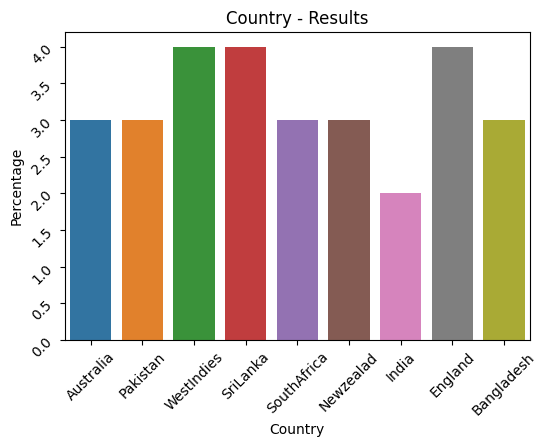

In [39]:
plt.figure(figsize=(6,4))
sns.countplot(x = "Country", data = Ground_Results_Per_Team.value_counts().reset_index())
plt.ylabel("Percentage")
plt.title("Country - Results")
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)

<ipython-input-43-205c484654aa>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  India_vs_England = WC_Grounds_History[WC_Grounds_History.Country == "England"]\


Text(0.5, 0, 'England')

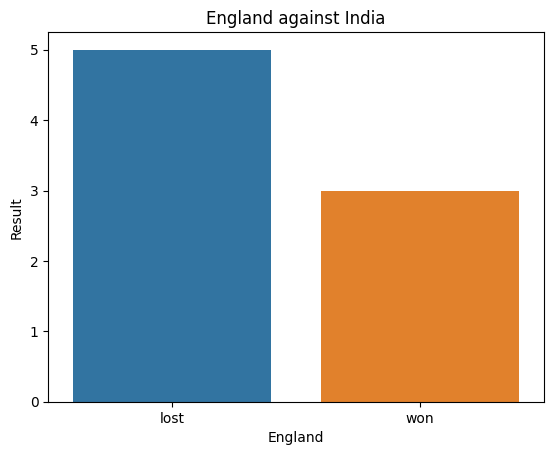

In [43]:
India_vs_England = WC_Grounds_History[WC_Grounds_History.Country == "England"]\
[WC_Grounds_History.Opposition.str.contains("India")]
India_vs_England = India_vs_England.Result.value_counts().reset_index()
sns.barplot(x = "index", y = "Result", data = India_vs_England).set_title("England against India")
plt.xlabel("England")

Text(0, 0.5, 'Winning Percentage')

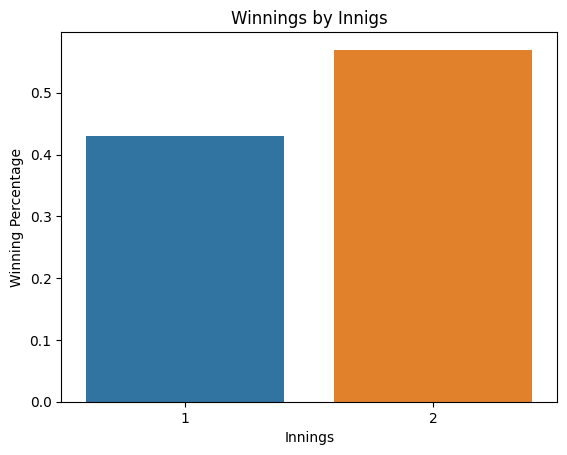

In [44]:
Inning_Wins = WC_Grounds_History[WC_Grounds_History.Result == "won"].Inns.value_counts(normalize = True).reset_index()
sns.barplot(x = "index", y = "Inns", data = Inning_Wins).set_title("Winnings by Innigs")
plt.xlabel("Innings")
plt.ylabel("Winning Percentage")

In [45]:
Pitch_Innings = WC_Grounds_History[WC_Grounds_History.Result == "won"][["Inns","Ground"]]
Pitch_Innings["Count"] = 1
Pitch_Innings = Pitch_Innings.groupby(["Ground","Inns"]).sum()
Pitch_Innings = Pitch_Innings.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()
Pitch_Innings.columns = ["Ground", "Inns","Wins"]
Pitch_Innings.head( 5 )

<ipython-input-45-4fdc5864655d>:4: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  Pitch_Innings = Pitch_Innings.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()


,Ground,Inns,Wins
0,"County Ground, Bristol",1,33.333333
1,"County Ground, Bristol",2,66.666667
2,"Edgbaston, Birmingham",1,41.666667
3,"Edgbaston, Birmingham",2,58.333333
4,"Headingley, Leeds",1,40.000000


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'County Ground, Bristol'),
  Text(1, 0, 'Edgbaston, Birmingham'),
  Text(2, 0, 'Headingley, Leeds'),
  Text(3, 0, "Lord's, London"),
  Text(4, 0, 'Old Trafford, Manchester'),
  Text(5, 0, 'Riverside Ground, Chester-le-Street'),
  Text(6, 0, 'Rose Bowl, Southampton'),
  Text(7, 0, 'Sophia Gardens, Cardiff'),
  Text(8, 0, 'The Oval, London'),
  Text(9, 0, 'Trent Bridge, Nottingham')])

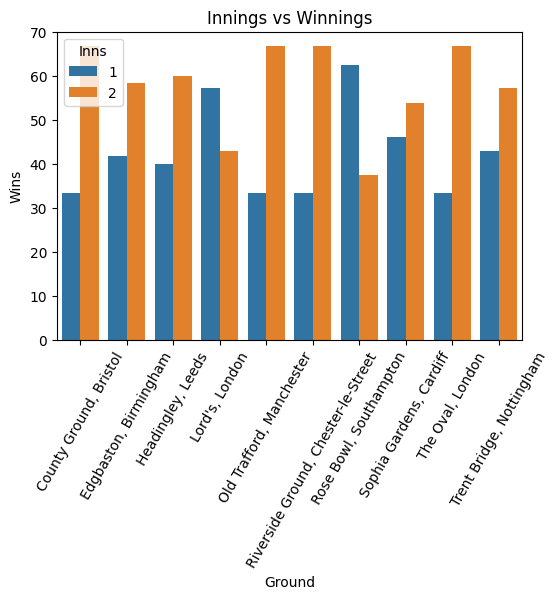

In [46]:
plt.figure(figsize=(6,4))
sns.barplot(x = "Ground", y = "Wins", hue = "Inns", data = Pitch_Innings).set_title("Innings vs Winnings")
plt.xticks(rotation = 60)

In [47]:
WC_Grounds_History = WC_Grounds_History[~WC_Grounds_History.Score.str.contains("D")]

Text(0, 0.5, 'Scores')

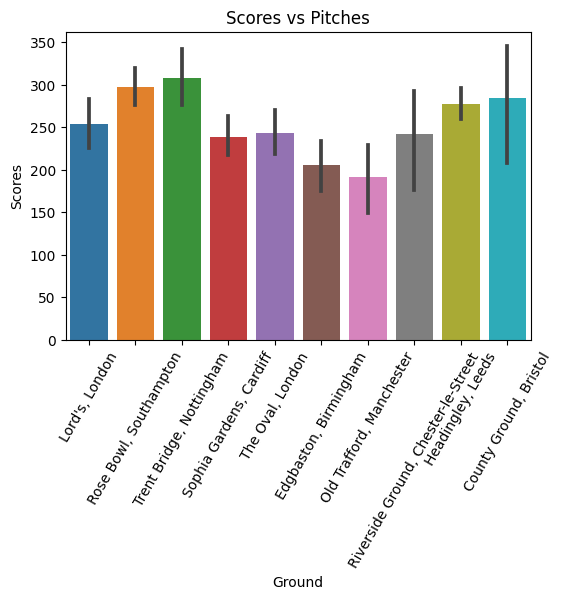

In [50]:
Scores = [int(item[0]) for item in WC_Grounds_History.Score.str.split("/")]
WC_Grounds_History["Score_without_wickets"] = Scores
Stadium_Scores = WC_Grounds_History[["Score_without_wickets","Ground"]]
Stadium_Scores = Stadium_Scores[Stadium_Scores.Score_without_wickets > 50]
plt.figure(figsize=(6,4))
#sns.barplot(x = "Country", y = "Count", hue = "Result", data = Ground_Results_Per_Team)
plt.xticks(rotation = 60)
sns.barplot(x = "Ground", y = "Score_without_wickets",data = Stadium_Scores).set_title("Scores vs Pitches")
plt.ylabel("Scores")

Text(0, 0.5, 'Scores')

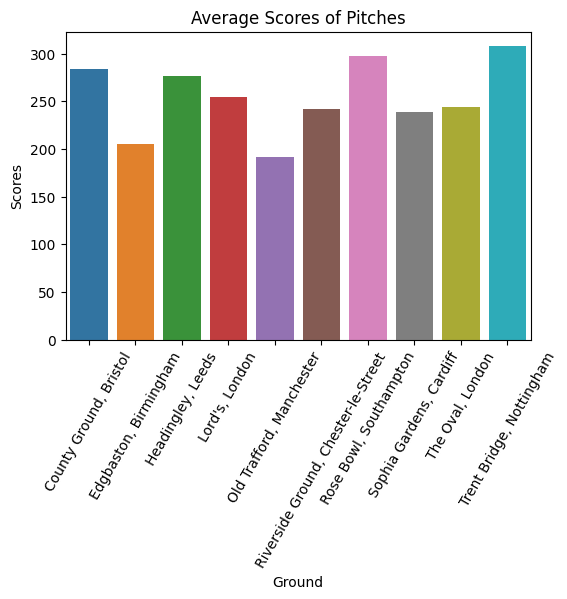

In [51]:
Stadium_Scores = Stadium_Scores[Stadium_Scores.Score_without_wickets > 50]
Stadium_Scores = Stadium_Scores.groupby("Ground").mean().reset_index()
plt.figure(figsize=(6,4))
sns.barplot(x = "Ground", y = "Score_without_wickets", data = Stadium_Scores).set_title("Average Scores of Pitches")
plt.xticks(rotation = 60)
plt.ylabel("Scores")

In [52]:
def no_of_wickets(value):
    if "/" not in value:
        return 10
    elif "D" in value:
        return 0
    else:
        return int(value.split("/")[1])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'County Ground, Bristol'),
  Text(1, 0, 'Edgbaston, Birmingham'),
  Text(2, 0, 'Headingley, Leeds'),
  Text(3, 0, "Lord's, London"),
  Text(4, 0, 'Old Trafford, Manchester'),
  Text(5, 0, 'Riverside Ground, Chester-le-Street'),
  Text(6, 0, 'Rose Bowl, Southampton'),
  Text(7, 0, 'Sophia Gardens, Cardiff'),
  Text(8, 0, 'The Oval, London'),
  Text(9, 0, 'Trent Bridge, Nottingham')])

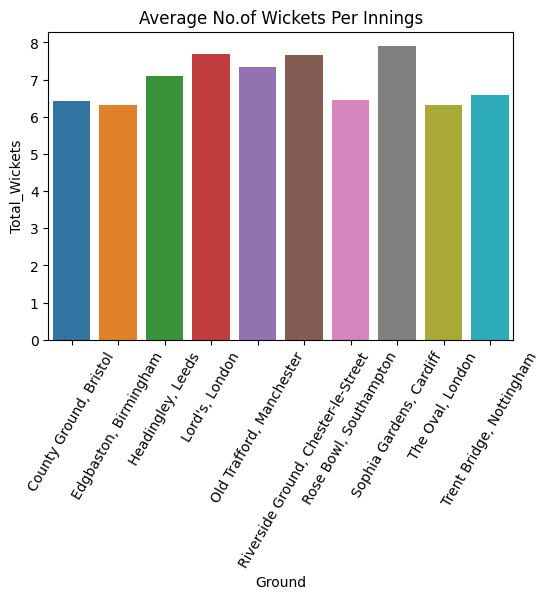

In [54]:
WC_Grounds_History["Total_Wickets"] = WC_Grounds_History.Score.apply(no_of_wickets)

Stadium_Wickets = WC_Grounds_History[["Total_Wickets","Ground"]]
Stadium_Wickets = Stadium_Wickets.groupby("Ground").mean().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(x = "Ground", y = "Total_Wickets", data = Stadium_Wickets).set_title("Average No.of Wickets Per Innings")
plt.xticks(rotation = 60)

In [55]:
Grounds = WC_Grounds_History.Ground.unique()
WC_Teams = WC_Grounds_History.Country.unique()
Ground_Winnings = {}
for Ground in Grounds:
    Ground_Winnings.update({Ground : {}})
    for Team in WC_Teams:
        Country_Ground_Record = WC_Grounds_History[(WC_Grounds_History.Country == Team) & \
                                                   (WC_Grounds_History.Ground == Ground)]
        #print("Ground : ", Ground, "Team : ", Team)
        matches_played = len(Country_Ground_Record)
        if matches_played == 0:
            continue
        matches_won = len(Country_Ground_Record[Country_Ground_Record.Result == "won"])
        winning_percentage = matches_won / matches_played * 100
        Ground_Winnings[Ground].update({Team : {"matches_played" : matches_played,\
                                       "matches_won": matches_won,\
                                       "winning_percentage" : winning_percentage}})
Ground_Winnings["Lord's, London"]

{'Newzealad': {'matches_played': 1,
  'matches_won': 1,
  'winning_percentage': 100.0},
 'England': {'matches_played': 7,
  'matches_won': 3,
  'winning_percentage': 42.857142857142854},
 'SouthAfrica': {'matches_played': 1,
  'matches_won': 1,
  'winning_percentage': 100.0},
 'India': {'matches_played': 1, 'matches_won': 0, 'winning_percentage': 0.0},
 'Pakistan': {'matches_played': 1,
  'matches_won': 0,
  'winning_percentage': 0.0},
 'Australia': {'matches_played': 1,
  'matches_won': 1,
  'winning_percentage': 100.0},
 'SriLanka': {'matches_played': 1,
  'matches_won': 1,
  'winning_percentage': 100.0}}

In [56]:
Data_Frame_Data = []
for Pitch, P_Data in Ground_Winnings.items():

    for Team, Team_Data in P_Data.items():
        inside = []
        inside.extend([Pitch,Team,Team_Data["matches_played"],\
                       Team_Data["matches_won"],Team_Data["winning_percentage"]])
        Data_Frame_Data.append(inside)

In [57]:
Columns = ["Ground", "Country","Played","Won","Win_Percentage"]
Data_Frame_Data
Pitch_Team_Winnings = pd.DataFrame(Data_Frame_Data, columns=Columns)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, "Lord's, London"),
  Text(1, 0, 'Rose Bowl, Southampton'),
  Text(2, 0, 'Trent Bridge, Nottingham'),
  Text(3, 0, 'Sophia Gardens, Cardiff'),
  Text(4, 0, 'The Oval, London'),
  Text(5, 0, 'Edgbaston, Birmingham'),
  Text(6, 0, 'Old Trafford, Manchester'),
  Text(7, 0, 'Riverside Ground, Chester-le-Street'),
  Text(8, 0, 'Headingley, Leeds'),
  Text(9, 0, 'County Ground, Bristol')])

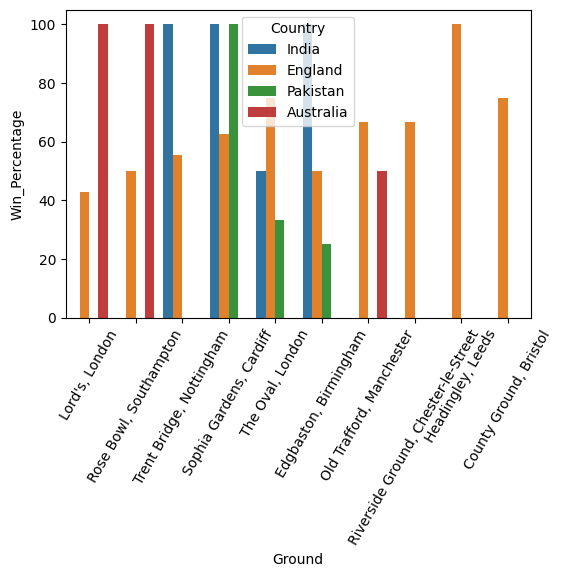

In [59]:
Pitch_Team_Winnings
plt.figure(figsize=(6,4))
sns.barplot(x = "Ground", y = "Win_Percentage",hue = "Country", data = Pitch_Team_Winnings,\
            hue_order = ["India","England","Pakistan","Australia"])
plt.xticks(rotation = 60)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, "Lord's, London"),
  Text(1, 0, 'Rose Bowl, Southampton'),
  Text(2, 0, 'Trent Bridge, Nottingham'),
  Text(3, 0, 'Sophia Gardens, Cardiff'),
  Text(4, 0, 'The Oval, London'),
  Text(5, 0, 'Edgbaston, Birmingham'),
  Text(6, 0, 'Old Trafford, Manchester'),
  Text(7, 0, 'Riverside Ground, Chester-le-Street'),
  Text(8, 0, 'Headingley, Leeds'),
  Text(9, 0, 'County Ground, Bristol')])

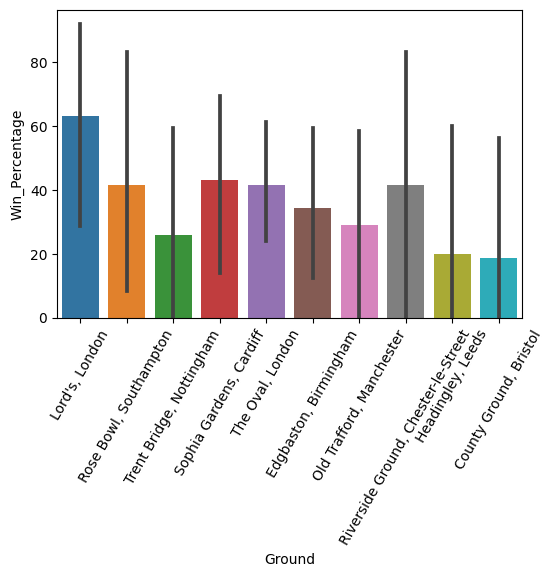

In [61]:
plt.figure(figsize=(6,4))
sns.barplot(x = "Ground", y = "Win_Percentage", data = Pitch_Team_Winnings,\
            hue_order = ["SouthAfrica","Newzealad","WestIndies","SriLanka"])
plt.xticks(rotation = 60)

## Batsman who played good.

In [62]:
#Removing DNB, and Fetching the Details of Batsmen stats only in England
batsman_data.drop(columns=batsman_data.columns[0],inplace=True)
Batsman_Data = batsman_data[~batsman_data.Bat1.isin(["DNB","TDNB"])]
Batsman_Data = Batsman_Data[Batsman_Data.Player_ID.isin(wc_players.ID)]
stadiums = [item[0] for item in set(WC_Ground_Stats)]
Batsman_Data_in_England = Batsman_Data[Batsman_Data.Ground.isin(stadiums)]

In [63]:
#Calculating Averages
def Out_or_NotOut(value):
    if "*" in value:
        return 0
    else:
        return 1
Batsman_Data_in_England["Out_or_NotOut"] = Batsman_Data_in_England.Bat1.apply(Out_or_NotOut)

<ipython-input-63-b517ae0e2f95>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Batsman_Data_in_England["Out_or_NotOut"] = Batsman_Data_in_England.Bat1.apply(Out_or_NotOut)


In [64]:
change_type = ["Runs","BF","4s","6s"]
for i in change_type:
    Batsman_Data_in_England[i] = Batsman_Data_in_England[i].astype("int")
Batsman_Data_in_England.head()
Batsman_Data_Information = Batsman_Data_in_England
Batsman_Data_in_England = Batsman_Data_in_England.groupby(["Ground","Batsman"]).sum().reset_index()

<ipython-input-64-9087a5ae7164>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Batsman_Data_in_England[i] = Batsman_Data_in_England[i].astype("int")
<ipython-input-64-9087a5ae7164>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Batsman_Data_in_England = Batsman_Data_in_England.groupby(["Ground","Batsman"]).sum().reset_index()


In [65]:
Batsman_Data_in_England["Average"] = Batsman_Data_in_England["Runs"]/Batsman_Data_in_England.Out_or_NotOut

In [66]:
Batsman_Data_in_England.sort_values(by=["Average"],ascending=False).head(3)

,Ground,Batsman,Runs,BF,4s,6s,Player_ID,Out_or_NotOut,Average
369,Nottingham,Ravindra Jadeja,12,9,1,0,234675,0,inf
167,Chester-le-Street,Adil Rashid,12,9,2,0,244497,0,inf
389,Southampton,Chris Morris,35,22,3,2,439952,0,inf


In [67]:
Batsman_Scores = Batsman_Data_in_England.groupby(["Batsman"]).sum().reset_index()
Batsman_Scores["Average"] = Batsman_Scores["Runs"]/Batsman_Scores["Out_or_NotOut"]
Batsman_Scores.sort_values(by = "Average",ascending=False).sample(5)

<ipython-input-67-0a46811fe5b9>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Batsman_Scores = Batsman_Data_in_England.groupby(["Batsman"]).sum().reset_index()


,Batsman,Runs,BF,4s,6s,Player_ID,Out_or_NotOut,Average
35,Imam-ul-Haq,234,263,24,1,2273104,2,117.000000
23,Dinesh Karthik,155,203,18,1,330495,7,22.142857
40,Jason Roy,1686,1539,187,34,11937520,38,44.368421
21,Dhananjaya de Silva,1,6,0,0,465793,1,1.000000
41,Jasprit Bumrah,1,9,0,0,625383,1,1.000000


In [68]:
Best_Batsman_Average = Batsman_Scores[(Batsman_Scores.Out_or_NotOut>0) & (Batsman_Scores.Average > 40 )]\
.sort_values(by = "Average",ascending = False)
Best_Batsman_Average

,Batsman,Runs,BF,4s,6s,Player_ID,Out_or_NotOut,Average
35,Imam-ul-Haq,234,263,24,1,2273104,2,117.000000
25,Evin Lewis,200,152,18,9,1295703,2,100.000000
39,Jason Holder,152,121,10,7,1174455,2,76.000000
81,Ravindra Jadeja,281,258,29,5,2346750,4,70.250000
86,Sarfaraz Ahmed,465,502,38,1,2277600,7,66.428571
46,Jonny Bairstow,1439,1295,166,23,9220423,22,65.409091
92,Shikhar Dhawan,976,966,118,13,479995,15,65.066667
52,Kane Williamson,815,849,84,7,3890684,13,62.692308
82,Rohit Sharma,687,829,72,13,511530,12,57.250000
33,Hashim Amla,851,941,94,5,746402,15,56.733333


In [69]:
Player_WC_ID = Batsman_Data[["Player_ID","Batsman"]].drop_duplicates()

In [73]:
#Best Batsman with Average above 40
Player_ID = list(Best_Batsman_Average.merge(Player_WC_ID,how = "left",on = "Batsman")["Player_ID_y"].astype("int"))
Best_Batsman_Average["Player_ID"] = Player_ID
wc_players.columns = ["Player", "Player_ID","Country"]
Country_Player = list(Best_Batsman_Average.merge(wc_players,how = "left",on = "Player_ID")["Country"])
Best_Batsman_Average["Country"] = Country_Player
Best_Batsman_Average

,Batsman,Runs,BF,4s,6s,Player_ID,Out_or_NotOut,Average,Country
35,Imam-ul-Haq,234,263,24,1,568276,2,117.000000,Pakistan
25,Evin Lewis,200,152,18,9,431901,2,100.000000,WestIndies
39,Jason Holder,152,121,10,7,391485,2,76.000000,WestIndies
81,Ravindra Jadeja,281,258,29,5,234675,4,70.250000,India
86,Sarfaraz Ahmed,465,502,38,1,227760,7,66.428571,Pakistan
46,Jonny Bairstow,1439,1295,166,23,297433,22,65.409091,England
92,Shikhar Dhawan,976,966,118,13,28235,15,65.066667,India
52,Kane Williamson,815,849,84,7,277906,13,62.692308,NewZealand
82,Rohit Sharma,687,829,72,13,34102,12,57.250000,India
33,Hashim Amla,851,941,94,5,43906,15,56.733333,SouthAfrica


In [74]:
Best_Batsman_Average["Strike_Rate"] = Best_Batsman_Average["Runs"]/Best_Batsman_Average["BF"]*100
Best_Batsman_Average.head(5)

,Batsman,Runs,BF,4s,6s,Player_ID,Out_or_NotOut,Average,Country,Strike_Rate
35,Imam-ul-Haq,234,263,24,1,568276,2,117.000000,Pakistan,88.973384
25,Evin Lewis,200,152,18,9,431901,2,100.000000,WestIndies,131.578947
39,Jason Holder,152,121,10,7,391485,2,76.000000,WestIndies,125.619835
81,Ravindra Jadeja,281,258,29,5,234675,4,70.250000,India,108.914729
86,Sarfaraz Ahmed,465,502,38,1,227760,7,66.428571,Pakistan,92.629482


In [75]:
Best_Batsman_Average.sort_values(["Strike_Rate"],ascending = False).head()

,Batsman,Runs,BF,4s,6s,Player_ID,Out_or_NotOut,Average,Country,Strike_Rate
25,Evin Lewis,200,152,18,9,431901,2,100.0000,WestIndies,131.578947
39,Jason Holder,152,121,10,7,391485,2,76.0000,WestIndies,125.619835
47,Jos Buttler,1654,1358,147,47,308967,32,51.6875,England,121.796760
28,Fakhar Zaman,452,394,50,11,512191,8,56.5000,Pakistan,114.720812
34,Imad Wasim,224,200,22,5,227758,5,44.8000,Pakistan,112.000000


In [76]:
Best_Batsman_Average["Average_4s_per_wicket"] = Best_Batsman_Average["4s"]/Best_Batsman_Average["Out_or_NotOut"]
Best_Batsman_Average["Average_6s_per_wicket"] = Best_Batsman_Average["6s"]/Best_Batsman_Average["Out_or_NotOut"]

In [77]:
Best_Batsman_Average.sort_values(by = ["Average_4s_per_wicket"],ascending=False).head()

,Batsman,Runs,BF,4s,6s,Player_ID,Out_or_NotOut,Average,Country,Strike_Rate,Average_4s_per_wicket,Average_6s_per_wicket
35,Imam-ul-Haq,234,263,24,1,568276,2,117.000000,Pakistan,88.973384,12.000000,0.500000
25,Evin Lewis,200,152,18,9,431901,2,100.000000,WestIndies,131.578947,9.000000,4.500000
92,Shikhar Dhawan,976,966,118,13,28235,15,65.066667,India,101.035197,7.866667,0.866667
46,Jonny Bairstow,1439,1295,166,23,297433,22,65.409091,England,111.119691,7.545455,1.045455
81,Ravindra Jadeja,281,258,29,5,234675,4,70.250000,India,108.914729,7.250000,1.250000


In [78]:
Best_Batsman_Average.sort_values(by = ["Average_6s_per_wicket"],ascending=False).head()

,Batsman,Runs,BF,4s,6s,Player_ID,Out_or_NotOut,Average,Country,Strike_Rate,Average_4s_per_wicket,Average_6s_per_wicket
25,Evin Lewis,200,152,18,9,431901,2,100.000000,WestIndies,131.578947,9.00000,4.50000
39,Jason Holder,152,121,10,7,391485,2,76.000000,WestIndies,125.619835,5.00000,3.50000
18,David Miller,289,294,15,12,321777,6,48.166667,SouthAfrica,98.299320,2.50000,2.00000
47,Jos Buttler,1654,1358,147,47,308967,32,51.687500,England,121.796760,4.59375,1.46875
91,Shaun Marsh,372,374,28,11,6683,8,46.500000,Australia,99.465241,3.50000,1.37500


### Which Countries have highest no.of Best Batsman ?

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Pakistan'),
  Text(1, 0, 'WestIndies'),
  Text(2, 0, 'India'),
  Text(3, 0, 'England'),
  Text(4, 0, 'NewZealand'),
  Text(5, 0, 'SouthAfrica'),
  Text(6, 0, 'Bangladesh'),
  Text(7, 0, 'SriLanka'),
  Text(8, 0, 'Australia')])

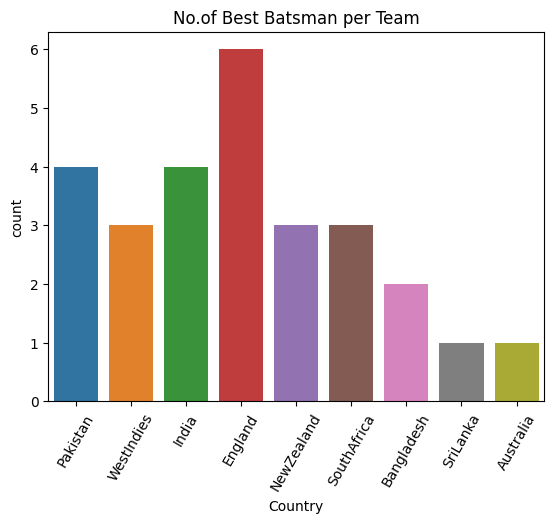

In [82]:
sns.countplot(x="Country", data= Best_Batsman_Average).set_title("No.of Best Batsman per Team")
plt.xticks(rotation = 60)

In [83]:
Best_Batsman_Average[["Country","Batsman"]].sort_values("Country")

,Country,Batsman
91,Australia,Shaun Marsh
62,Bangladesh,Mahmudullah
96,Bangladesh,Tamim Iqbal
47,England,Jos Buttler
46,England,Jonny Bairstow
45,England,Joe Root
24,England,Eoin Morgan
10,England,Ben Stokes
40,England,Jason Roy
92,India,Shikhar Dhawan


In [84]:
bowler_data = bowler_data[bowler_data.Ground.isin(stadiums)]
Bowler_Data = bowler_data[~bowler_data.Overs.str.contains('-')]
Bowler_Data.sample(5)

,Unnamed: 0,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Start Date,Match_ID,Bowler,Player_ID
61,62,10.0,0,51,1,5.10,51.00,60.0,v South Africa,The Oval,3 Jun 2017,ODI # 3877,Suranga Lakmal,49619
9896,9897,10.0,0,44,2,4.40,22.00,30.0,v England,Lord's,5 Sep 2015,ODI # 3681,Glenn Maxwell,325026
5591,5592,10.0,0,52,0,5.20,-,-,v Sri Lanka,The Oval,8 Jun 2017,ODI # 3882,Jasprit Bumrah,625383
6920,6921,8.0,1,32,1,4.00,32.00,48.0,v Australia,The Oval,13 Jun 2018,ODI # 4009,Mark Wood,351588
1003,1004,10.0,0,50,2,5.00,25.00,30.0,v England,Chester-le-Street,24 Jun 2006,ODI # 2386,Lasith Malinga,49758


In [85]:
def overs_to_ball(value):
    if "." in value:
        over = value.split(".")
        return int(over[0]) * 6 + int(over[1])
    else:
        return int(value) * 6

In [86]:
Bowler_Data["Balls"] = Bowler_Data.Overs.apply(overs_to_ball)
for i in ["Runs","Mdns","Wkts","Balls"]:
    Bowler_Data[i] = Bowler_Data[i].astype("float")
Bowler_Data.Ground = Bowler_Data.Ground.apply(Full_Ground_names)
Bowlers_Data_in_England = Bowler_Data.groupby(["Bowler"]).sum()[["Runs","Mdns","Wkts","Balls"]].reset_index()

<ipython-input-86-247456fe4725>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bowler_Data["Balls"] = Bowler_Data.Overs.apply(overs_to_ball)
<ipython-input-86-247456fe4725>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bowler_Data[i] = Bowler_Data[i].astype("float")
<ipython-input-86-247456fe4725>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

In [87]:
Bowlers_Data_in_England["Economy"] = Bowlers_Data_in_England.Runs * 6 /Bowlers_Data_in_England.Balls
Bowlers_Data_in_England["Average"] = Bowlers_Data_in_England.Runs/ Bowlers_Data_in_England.Wkts
Bowlers_Data_in_England["Strike_Rate"] = Bowlers_Data_in_England.Balls / Bowlers_Data_in_England.Wkts
Bowlers_Data_in_England.sample(5)

,Bowler,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate
54,Moeen Ali,1451.0,5.0,32.0,1607.0,5.417548,45.343750,50.218750
76,Tim Southee,704.0,10.0,25.0,761.0,5.550591,28.160000,30.440000
27,JP Duminy,209.0,0.0,5.0,258.0,4.860465,41.800000,51.600000
49,Martin Guptill,12.0,0.0,0.0,6.0,12.000000,inf,inf
78,Trent Boult,240.0,1.0,9.0,264.0,5.454545,26.666667,29.333333


In [88]:
Bowlers_Data_in_England = Bowlers_Data_in_England[(Bowlers_Data_in_England.Balls > 36) & (Bowlers_Data_in_England.Wkts > 0)]
Bowlers_Data_in_England

,Bowler,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate
1,Adam Zampa,65.0,1.0,2.0,74.0,5.270270,32.500000,37.000000
2,Adil Rashid,2219.0,3.0,72.0,2382.0,5.589421,30.819444,33.083333
3,Andile Phehlukwayo,158.0,1.0,3.0,144.0,6.583333,52.666667,48.000000
5,Angelo Mathews,232.0,1.0,8.0,306.0,4.549020,29.000000,38.250000
6,Ashley Nurse,202.0,0.0,1.0,167.0,7.257485,202.000000,167.000000
...,...,...,...,...,...,...,...,...
76,Tim Southee,704.0,10.0,25.0,761.0,5.550591,28.160000,30.440000
77,Tom Curran,211.0,1.0,7.0,180.0,7.033333,30.142857,25.714286
78,Trent Boult,240.0,1.0,9.0,264.0,5.454545,26.666667,29.333333
79,Virat Kohli,120.0,0.0,1.0,108.0,6.666667,120.000000,108.000000


In [91]:
Player_WC_ID = Bowler_Data[["Player_ID","Bowler"]].drop_duplicates()

Bowlers_Data_in_England = Bowlers_Data_in_England.merge(Player_WC_ID,how = "left",on = "Bowler")

Country_Player = list(Bowlers_Data_in_England.merge(wc_players,how = "left", on = "Player_ID")["Country"])
Bowlers_Data_in_England["Country"] = Country_Player
Bowlers_Data_in_England.iloc[57,-1] = "SriLanka"
Bowlers_Data_in_England

,Bowler,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate,Player_ID_x,Player_ID_y,Player_ID,Country
0,Adam Zampa,65.0,1.0,2.0,74.0,5.270270,32.500000,37.000000,379504,379504,379504,Australia
1,Adil Rashid,2219.0,3.0,72.0,2382.0,5.589421,30.819444,33.083333,244497,244497,244497,England
2,Andile Phehlukwayo,158.0,1.0,3.0,144.0,6.583333,52.666667,48.000000,540316,540316,540316,SouthAfrica
3,Angelo Mathews,232.0,1.0,8.0,306.0,4.549020,29.000000,38.250000,49764,49764,49764,SriLanka
4,Ashley Nurse,202.0,0.0,1.0,167.0,7.257485,202.000000,167.000000,315594,315594,315594,WestIndies
...,...,...,...,...,...,...,...,...,...,...,...,...
59,Tim Southee,704.0,10.0,25.0,761.0,5.550591,28.160000,30.440000,232364,232364,232364,NewZealand
60,Tom Curran,211.0,1.0,7.0,180.0,7.033333,30.142857,25.714286,550235,550235,550235,England
61,Trent Boult,240.0,1.0,9.0,264.0,5.454545,26.666667,29.333333,277912,277912,277912,NewZealand
62,Virat Kohli,120.0,0.0,1.0,108.0,6.666667,120.000000,108.000000,253802,253802,253802,India


### Highest Number of Maiden Overs

In [92]:
Bowlers_Data_in_England.sort_values(by = ["Mdns"], ascending=False)[:10]

,Bowler,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate,Player_ID_x,Player_ID_y,Player_ID,Country
32,Lasith Malinga,1039.0,12.0,36.0,1126.0,5.536412,28.861111,31.277778,49758,49758,49758,SriLanka
9,Chris Woakes,1185.0,12.0,33.0,1257.0,5.656325,35.909091,38.090909,247235,247235,247235,England
6,Bhuvneshwar Kumar,517.0,11.0,18.0,693.0,4.476190,28.722222,38.500000,326016,326016,326016,India
35,Mark Wood,1234.0,10.0,28.0,1351.0,5.480385,44.071429,48.250000,351588,351588,351588,England
59,Tim Southee,704.0,10.0,25.0,761.0,5.550591,28.160000,30.440000,232364,232364,232364,NewZealand
11,David Willey,1221.0,8.0,39.0,1221.0,6.000000,31.307692,31.307692,308251,308251,308251,England
36,Mashrafe Mortaza,480.0,6.0,8.0,606.0,4.752475,60.000000,75.750000,56007,56007,56007,Bangladesh
40,Moeen Ali,1451.0,5.0,32.0,1607.0,5.417548,45.343750,50.218750,8917,8917,8917,England
50,Ravindra Jadeja,729.0,5.0,27.0,852.0,5.133803,27.000000,31.555556,234675,234675,234675,India
26,Kagiso Rabada,268.0,5.0,8.0,312.0,5.153846,33.500000,39.000000,550215,550215,550215,SouthAfrica


In [93]:
Bowlers_Data_in_England["Maidens_per_Overs_Percentage"] = \
((Bowlers_Data_in_England.Mdns*6)/(Bowlers_Data_in_England.Balls))*100
Bowlers_Data_in_England.sample(5)

,Bowler,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate,Player_ID_x,Player_ID_y,Player_ID,Country,Maidens_per_Overs_Percentage
23,Jhye Richardson,214.0,1.0,5.0,162.0,7.925926,42.800000,32.400000,774223,774223,774223,Australia,3.703704
46,Nathan Coulter-Nile,123.0,2.0,4.0,156.0,4.730769,30.750000,39.000000,261354,261354,261354,Australia,7.692308
21,Jasprit Bumrah,210.0,1.0,4.0,252.0,5.000000,52.500000,63.000000,625383,625383,625383,India,2.380952
6,Bhuvneshwar Kumar,517.0,11.0,18.0,693.0,4.476190,28.722222,38.500000,326016,326016,326016,India,9.523810
16,Hasan Ali,623.0,3.0,23.0,666.0,5.612613,27.086957,28.956522,681305,681305,681305,Pakistan,2.702703


In [94]:
Bowlers_Data_in_England.sort_values(by = ["Maidens_per_Overs_Percentage"], ascending=False)[:10]

,Bowler,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate,Player_ID_x,Player_ID_y,Player_ID,Country,Maidens_per_Overs_Percentage
30,Kemar Roach,75.0,4.0,3.0,96.0,4.687500,25.000000,32.000000,230553,230553,230553,WestIndies,25.000000
26,Kagiso Rabada,268.0,5.0,8.0,312.0,5.153846,33.500000,39.000000,550215,550215,550215,SouthAfrica,9.615385
6,Bhuvneshwar Kumar,517.0,11.0,18.0,693.0,4.476190,28.722222,38.500000,326016,326016,326016,India,9.523810
0,Adam Zampa,65.0,1.0,2.0,74.0,5.270270,32.500000,37.000000,379504,379504,379504,Australia,8.108108
59,Tim Southee,704.0,10.0,25.0,761.0,5.550591,28.160000,30.440000,232364,232364,232364,NewZealand,7.884363
46,Nathan Coulter-Nile,123.0,2.0,4.0,156.0,4.730769,30.750000,39.000000,261354,261354,261354,Australia,7.692308
32,Lasith Malinga,1039.0,12.0,36.0,1126.0,5.536412,28.861111,31.277778,49758,49758,49758,SriLanka,6.394316
36,Mashrafe Mortaza,480.0,6.0,8.0,606.0,4.752475,60.000000,75.750000,56007,56007,56007,Bangladesh,5.940594
9,Chris Woakes,1185.0,12.0,33.0,1257.0,5.656325,35.909091,38.090909,247235,247235,247235,England,5.727924
25,Junaid Khan,399.0,4.0,11.0,429.0,5.580420,36.272727,39.000000,259551,259551,259551,Pakistan,5.594406


### Top 10 Best Bowlers based on Average

In [95]:
Bowlers_Data_in_England.sort_values(by = ["Average"])[:10]

,Bowler,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate,Player_ID_x,Player_ID_y,Player_ID,Country,Maidens_per_Overs_Percentage
31,Kuldeep Yadav,148.0,0.0,9.0,180.0,4.933333,16.444444,20.000000,559235,559235,559235,India,0.000000
43,Mohammed Shami,152.0,1.0,8.0,195.0,4.676923,19.000000,24.375000,481896,481896,481896,India,3.076923
29,Kedar Jadhav,67.0,0.0,3.0,72.0,5.583333,22.333333,24.000000,290716,290716,290716,India,0.000000
44,Mosaddek Hossain,73.0,0.0,3.0,74.0,5.918919,24.333333,24.666667,550133,550133,550133,Bangladesh,0.000000
30,Kemar Roach,75.0,4.0,3.0,96.0,4.687500,25.000000,32.000000,230553,230553,230553,WestIndies,25.000000
27,Kane Richardson,156.0,1.0,6.0,156.0,6.000000,26.000000,26.000000,272262,272262,272262,Australia,3.846154
61,Trent Boult,240.0,1.0,9.0,264.0,5.454545,26.666667,29.333333,277912,277912,277912,NewZealand,2.272727
50,Ravindra Jadeja,729.0,5.0,27.0,852.0,5.133803,27.000000,31.555556,234675,234675,234675,India,3.521127
16,Hasan Ali,623.0,3.0,23.0,666.0,5.612613,27.086957,28.956522,681305,681305,681305,Pakistan,2.702703
56,Steve Smith,191.0,0.0,7.0,228.0,5.026316,27.285714,32.571429,267192,267192,267192,Australia,0.000000


### Top 10 Best Bowlers based on Economy

In [96]:
Bowlers_Data_in_England.sort_values(by = ["Economy"])[:10]

,Bowler,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate,Player_ID_x,Player_ID_y,Player_ID,Country,Maidens_per_Overs_Percentage
47,Nathan Lyon,70.0,0.0,1.0,102.0,4.117647,70.000000,102.000000,272279,272279,272279,Australia,0.000000
55,Shoaib Malik,376.0,3.0,11.0,504.0,4.476190,34.181818,45.818182,42657,42657,42657,Pakistan,3.571429
6,Bhuvneshwar Kumar,517.0,11.0,18.0,693.0,4.476190,28.722222,38.500000,326016,326016,326016,India,9.523810
63,Yuzvendra Chahal,135.0,0.0,2.0,180.0,4.500000,67.500000,90.000000,430246,430246,430246,India,0.000000
3,Angelo Mathews,232.0,1.0,8.0,306.0,4.549020,29.000000,38.250000,49764,49764,49764,SriLanka,1.960784
41,Mohammad Hafeez,540.0,1.0,10.0,711.0,4.556962,54.000000,71.100000,41434,41434,41434,Pakistan,0.843882
43,Mohammed Shami,152.0,1.0,8.0,195.0,4.676923,19.000000,24.375000,481896,481896,481896,India,3.076923
30,Kemar Roach,75.0,4.0,3.0,96.0,4.687500,25.000000,32.000000,230553,230553,230553,WestIndies,25.000000
7,Chris Gayle,446.0,2.0,15.0,566.0,4.727915,29.733333,37.733333,51880,51880,51880,WestIndies,2.120141
46,Nathan Coulter-Nile,123.0,2.0,4.0,156.0,4.730769,30.750000,39.000000,261354,261354,261354,Australia,7.692308


### Top 10 Best Bowlers based on Strike Rate

In [97]:
Bowlers_Data_in_England.sort_values(by = ["Strike_Rate"])[:10]

,Bowler,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate,Player_ID_x,Player_ID_y,Player_ID,Country,Maidens_per_Overs_Percentage
31,Kuldeep Yadav,148.0,0.0,9.0,180.0,4.933333,16.444444,20.000000,559235,559235,559235,India,0.000000
29,Kedar Jadhav,67.0,0.0,3.0,72.0,5.583333,22.333333,24.000000,290716,290716,290716,India,0.000000
43,Mohammed Shami,152.0,1.0,8.0,195.0,4.676923,19.000000,24.375000,481896,481896,481896,India,3.076923
44,Mosaddek Hossain,73.0,0.0,3.0,74.0,5.918919,24.333333,24.666667,550133,550133,550133,Bangladesh,0.000000
60,Tom Curran,211.0,1.0,7.0,180.0,7.033333,30.142857,25.714286,550235,550235,550235,England,3.333333
27,Kane Richardson,156.0,1.0,6.0,156.0,6.000000,26.000000,26.000000,272262,272262,272262,Australia,3.846154
16,Hasan Ali,623.0,3.0,23.0,666.0,5.612613,27.086957,28.956522,681305,681305,681305,Pakistan,2.702703
22,Jeevan Mendis,170.0,0.0,6.0,174.0,5.862069,28.333333,29.000000,49700,49700,49700,SriLanka,0.000000
61,Trent Boult,240.0,1.0,9.0,264.0,5.454545,26.666667,29.333333,277912,277912,277912,NewZealand,2.272727
42,Mohammad Hasnain,80.0,0.0,2.0,60.0,8.000000,40.000000,30.000000,1158100,1158100,1158100,Pakistan,0.000000


### Top 10 Highest Wicket Takers

In [98]:
Bowlers_Data_in_England.sort_values(by = ["Wkts"],ascending=False)[:10]

,Bowler,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate,Player_ID_x,Player_ID_y,Player_ID,Country,Maidens_per_Overs_Percentage
1,Adil Rashid,2219.0,3.0,72.0,2382.0,5.589421,30.819444,33.083333,244497,244497,244497,England,0.755668
33,Liam Plunkett,2033.0,3.0,68.0,2071.0,5.889908,29.897059,30.455882,19264,19264,19264,England,0.869145
11,David Willey,1221.0,8.0,39.0,1221.0,6.000000,31.307692,31.307692,308251,308251,308251,England,3.931204
32,Lasith Malinga,1039.0,12.0,36.0,1126.0,5.536412,28.861111,31.277778,49758,49758,49758,SriLanka,6.394316
9,Chris Woakes,1185.0,12.0,33.0,1257.0,5.656325,35.909091,38.090909,247235,247235,247235,England,5.727924
40,Moeen Ali,1451.0,5.0,32.0,1607.0,5.417548,45.343750,50.218750,8917,8917,8917,England,1.866833
5,Ben Stokes,1224.0,1.0,30.0,1189.0,6.176619,40.800000,39.633333,311158,311158,311158,England,0.504626
35,Mark Wood,1234.0,10.0,28.0,1351.0,5.480385,44.071429,48.250000,351588,351588,351588,England,4.441155
50,Ravindra Jadeja,729.0,5.0,27.0,852.0,5.133803,27.000000,31.555556,234675,234675,234675,India,3.521127
59,Tim Southee,704.0,10.0,25.0,761.0,5.550591,28.160000,30.440000,232364,232364,232364,NewZealand,7.884363


### Which Countries have Best Bowlers ?

In [100]:
aggregations = {
    'Runs':'sum','Mdns':'sum',
    'Wkts':'sum','Balls':'sum',
    'Economy': 'mean','Average':'mean',
    'Strike_Rate':'mean','Maidens_per_Overs_Percentage':'mean'
}
Bowlers_Data_in_England_TeamWise = Bowlers_Data_in_England.groupby('Country').agg(aggregations).reset_index()
Bowlers_Data_in_England_TeamWise

,Country,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate,Maidens_per_Overs_Percentage
0,Australia,2175.0,12.0,60.0,2300.0,5.631351,42.014177,46.166234,3.249520
1,Bangladesh,1358.0,6.0,22.0,1484.0,5.778804,79.500000,81.583333,1.188119
2,England,11467.0,43.0,318.0,11942.0,5.920822,40.538542,41.417132,2.381099
3,India,2467.0,19.0,77.0,2901.0,5.255050,47.922222,52.581173,2.236536
4,NewZealand,1782.0,11.0,53.0,1769.0,6.263260,37.813667,35.754667,2.031418
5,Pakistan,2999.0,12.0,74.0,3366.0,6.028354,56.615722,54.646572,1.536407
6,SouthAfrica,1511.0,12.0,40.0,1681.0,5.552081,41.977381,45.035714,3.355573
7,SriLanka,2592.0,14.0,78.0,2721.0,5.701535,39.753114,42.422306,1.564634
8,WestIndies,885.0,6.0,21.0,969.0,5.903939,84.433333,76.683333,6.780035


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Australia'),
  Text(1, 0, 'England'),
  Text(2, 0, 'SouthAfrica'),
  Text(3, 0, 'SriLanka'),
  Text(4, 0, 'WestIndies'),
  Text(5, 0, 'India'),
  Text(6, 0, 'Pakistan'),
  Text(7, 0, 'NewZealand'),
  Text(8, 0, 'Bangladesh')])

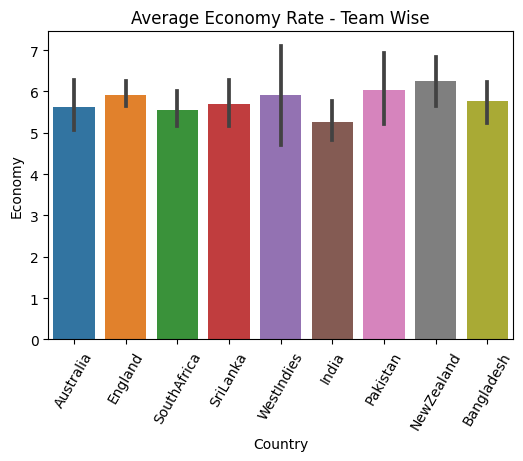

In [102]:
plt.figure(figsize=(6,4))
sns.barplot(x = "Country", y = "Economy", data = Bowlers_Data_in_England).set_title("Average Economy Rate - Team Wise")
plt.xticks(rotation = 60)

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Australia'),
  Text(1, 0, 'England'),
  Text(2, 0, 'SouthAfrica'),
  Text(3, 0, 'SriLanka'),
  Text(4, 0, 'WestIndies'),
  Text(5, 0, 'India'),
  Text(6, 0, 'Pakistan'),
  Text(7, 0, 'NewZealand'),
  Text(8, 0, 'Bangladesh')])

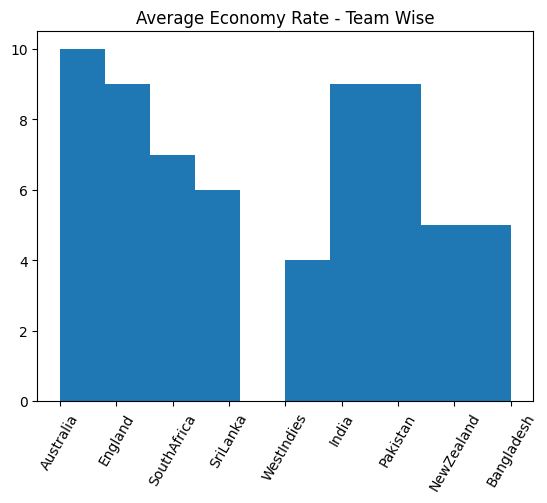

In [106]:
plt.title("Average Economy Rate - Team Wise")
plt.hist(x = "Country", data = Bowlers_Data_in_England)
plt.xticks(rotation = 60)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Australia'),
  Text(1, 0, 'England'),
  Text(2, 0, 'SouthAfrica'),
  Text(3, 0, 'SriLanka'),
  Text(4, 0, 'WestIndies'),
  Text(5, 0, 'India'),
  Text(6, 0, 'Pakistan'),
  Text(7, 0, 'NewZealand'),
  Text(8, 0, 'Bangladesh')])

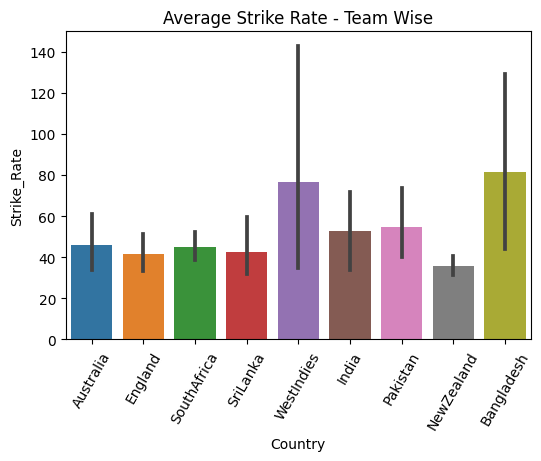

In [110]:
plt.figure(figsize=(6,4))
sns.barplot(x = "Country", y = "Strike_Rate", data = Bowlers_Data_in_England).set_title("Average Strike Rate - Team Wise")
plt.xticks(rotation = 60)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Australia'),
  Text(1, 0, 'England'),
  Text(2, 0, 'SouthAfrica'),
  Text(3, 0, 'SriLanka'),
  Text(4, 0, 'WestIndies'),
  Text(5, 0, 'India'),
  Text(6, 0, 'Pakistan'),
  Text(7, 0, 'NewZealand'),
  Text(8, 0, 'Bangladesh')])

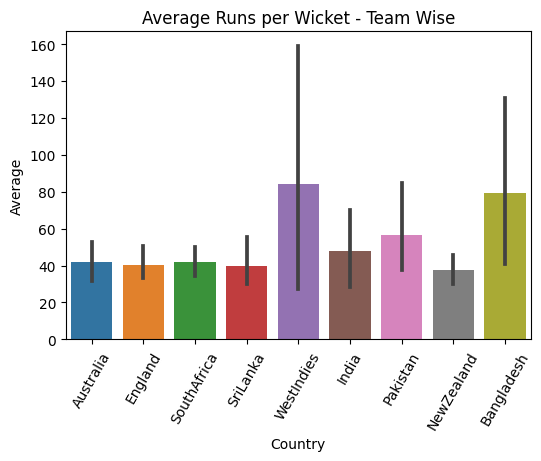

In [109]:
plt.figure(figsize=(6,4))
sns.barplot(x = "Country", y = "Average", data = Bowlers_Data_in_England).set_title("Average Runs per Wicket - Team Wise")
plt.xticks(rotation = 60)

<ipython-input-112-5eb521b20621>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(["Australia"]+[item for item in Bowlers_Data_in_England_TeamWise.Country])


(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.]),
 [Text(-1.0, 0, 'Australia'),
  Text(0.0, 0, 'Australia'),
  Text(1.0, 0, 'Bangladesh'),
  Text(2.0, 0, 'England'),
  Text(3.0, 0, 'India'),
  Text(4.0, 0, 'NewZealand'),
  Text(5.0, 0, 'Pakistan'),
  Text(6.0, 0, 'SouthAfrica'),
  Text(7.0, 0, 'SriLanka'),
  Text(8.0, 0, 'WestIndies'),
  Text(9.0, 0, '')])

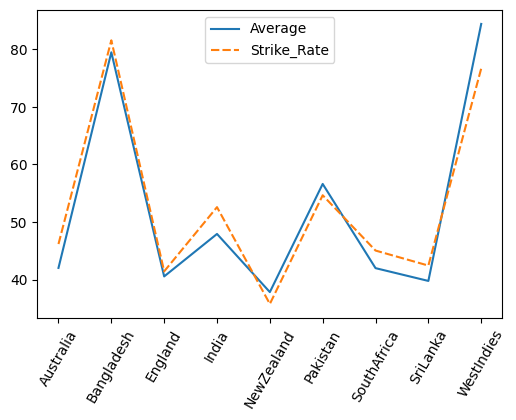

In [112]:
plt.figure(figsize=(6,4))
g = sns.lineplot( data = Bowlers_Data_in_England_TeamWise[Bowlers_Data_in_England_TeamWise.columns[6:8]])
g.set_xticklabels(["Australia"]+[item for item in Bowlers_Data_in_England_TeamWise.Country])
plt.xticks(rotation = 60)

<ipython-input-113-aa8011da3331>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(["Australia"]+[item for item in Bowlers_Data_in_England_TeamWise.Country])


(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.]),
 [Text(-1.0, 0, 'Australia'),
  Text(0.0, 0, 'Australia'),
  Text(1.0, 0, 'Bangladesh'),
  Text(2.0, 0, 'England'),
  Text(3.0, 0, 'India'),
  Text(4.0, 0, 'NewZealand'),
  Text(5.0, 0, 'Pakistan'),
  Text(6.0, 0, 'SouthAfrica'),
  Text(7.0, 0, 'SriLanka'),
  Text(8.0, 0, 'WestIndies'),
  Text(9.0, 0, '')])

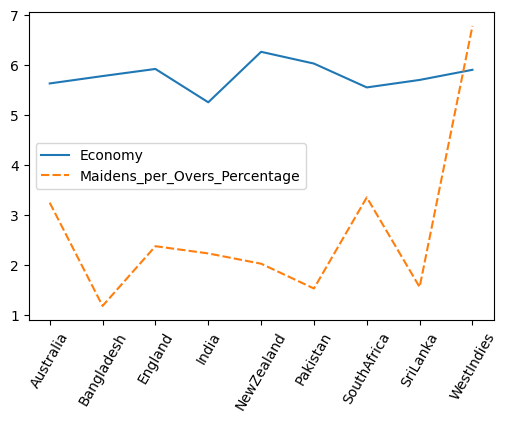

In [113]:
plt.figure(figsize=(6,4))
g = sns.lineplot( data = Bowlers_Data_in_England_TeamWise[["Economy","Maidens_per_Overs_Percentage"]])
g.set_xticklabels(["Australia"]+[item for item in Bowlers_Data_in_England_TeamWise.Country])
plt.xticks(rotation = 60)

In [114]:
Best_Bowlers_Data = Bowlers_Data_in_England[(Bowlers_Data_in_England.Balls > 150) &\
                        (Bowlers_Data_in_England.Average < 40) &\
                        (Bowlers_Data_in_England.Strike_Rate < 40)&\
                        (Bowlers_Data_in_England.Economy < 7.5)]
Best_Bowlers_Data

,Bowler,Runs,Mdns,Wkts,Balls,Economy,Average,Strike_Rate,Player_ID_x,Player_ID_y,Player_ID,Country,Maidens_per_Overs_Percentage
1,Adil Rashid,2219.0,3.0,72.0,2382.0,5.589421,30.819444,33.083333,244497,244497,244497,England,0.755668
3,Angelo Mathews,232.0,1.0,8.0,306.0,4.549020,29.000000,38.250000,49764,49764,49764,SriLanka,1.960784
6,Bhuvneshwar Kumar,517.0,11.0,18.0,693.0,4.476190,28.722222,38.500000,326016,326016,326016,India,9.523810
7,Chris Gayle,446.0,2.0,15.0,566.0,4.727915,29.733333,37.733333,51880,51880,51880,WestIndies,2.120141
9,Chris Woakes,1185.0,12.0,33.0,1257.0,5.656325,35.909091,38.090909,247235,247235,247235,England,5.727924
10,Dale Steyn,324.0,3.0,10.0,364.0,5.340659,32.400000,36.400000,47492,47492,47492,SouthAfrica,4.945055
11,David Willey,1221.0,8.0,39.0,1221.0,6.000000,31.307692,31.307692,308251,308251,308251,England,3.931204
16,Hasan Ali,623.0,3.0,23.0,666.0,5.612613,27.086957,28.956522,681305,681305,681305,Pakistan,2.702703
18,Imran Tahir,148.0,0.0,5.0,165.0,5.381818,29.600000,33.000000,40618,40618,40618,SouthAfrica,0.000000
22,Jeevan Mendis,170.0,0.0,6.0,174.0,5.862069,28.333333,29.000000,49700,49700,49700,SriLanka,0.000000


In [121]:
# sns.countplot(Bowlers_Data_in_England[(Bowlers_Data_in_England.Balls > 150) &\
#                         (Bowlers_Data_in_England.Average < 40) &\
#                         (Bowlers_Data_in_England.Strike_Rate < 40)&\
#                         (Bowlers_Data_in_England.Economy < 7.5)].Country).\
# set_title("No.of Best Bowlers per Team")
# plt.xticks(rotation = 60)

### Best All Rounders

In [122]:
Bowler_Data = Bowler_Data[Bowler_Data.columns[1:]]
Bowler_Data.columns = ['Overs', 'Maidens', 'Runs_Given', 'Wickets', 'Economy', 'Bowling_Average', 'Bowling_StrikeRate', 'Opposition',\
                       'Ground', 'Start_Date', 'Match_ID', 'Player', 'Player_ID', 'Balls_Bowled']
Bowler_Data.sample(5)

,Overs,Maidens,Runs_Given,Wickets,Economy,Bowling_Average,Bowling_StrikeRate,Opposition,Ground,Start_Date,Match_ID,Player,Player_ID,Balls_Bowled
7294,3.0,0.0,15.0,0.0,5.00,-,-,v Sri Lanka,"Edgbaston, Birmingham",24 Jun 2016,ODI # 3753,Joe Root,303669,18.0
967,10.0,0.0,64.0,2.0,6.40,32.00,30.0,v England,"Trent Bridge, Nottingham",21 Jun 2016,ODI # 3751,Nuwan Pradeep,324358,60.0
2188,10.0,0.0,50.0,2.0,5.00,25.00,30.0,v England,"Rose Bowl, Southampton",27 May 2017,ODI # 3873,Kagiso Rabada,550215,60.0
5593,10.0,1.0,39.0,2.0,3.90,19.50,30.0,v Bangladesh,"Edgbaston, Birmingham",15 Jun 2017,ODI # 3891,Jasprit Bumrah,625383,60.0
9898,10.0,0.0,54.0,1.0,5.40,54.00,60.0,v England,"Headingley, Leeds",11 Sep 2015,ODI # 3683,Glenn Maxwell,325026,60.0


In [123]:
Batsman_Data_Information.Ground = Batsman_Data_Information.Ground.apply(Full_Ground_names)
Batsman_Data_Information = Batsman_Data_Information[["Runs","BF","SR","4s","6s","Match_ID",\
                                                     "Player_ID","Out_or_NotOut"]]
Batsman_Data_Information.columns = ["Runs_Scored","Balls_Faced","Batting_StrikeRate","4s","6s",\
                                    "Match_ID","Player_ID","Out_or_NotOut"]

Batsman_Data_Information.sample(5)

<ipython-input-123-ca0ec1e0ff3b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Batsman_Data_Information.Ground = Batsman_Data_Information.Ground.apply(Full_Ground_names)


,Runs_Scored,Balls_Faced,Batting_StrikeRate,4s,6s,Match_ID,Player_ID,Out_or_NotOut
1529,47,44,106.81,5,0,ODI # 3882,300631,0
10104,0,0,-,0,0,ODI # 3681,261354,0
7412,39,25,156.00,5,0,ODI # 3865,244497,1
7585,1,2,50.00,0,0,ODI # 3874,249866,1
6297,37,59,62.71,2,0,ODI # 4016,28081,1


In [124]:
All_Rounders_Data = Bowler_Data.merge(Batsman_Data_Information,on = ["Match_ID","Player_ID"])
# All_Rounders_Data[["Player","Player_ID","Match_ID","Start_Date","Ground","Opposition","Runs_Scored","Balls_Faced",\
#                   "Batting_StrikeRate","4s","6s","Out_or_NotOut","Overs","Maidens","Runs_Given","Wickets","Economy",\
#                   "Bowling_Average","Bowling_StrikeRate"]]
All_Rounders_Data.sample(5)

,Overs,Maidens,Runs_Given,Wickets,Economy,Bowling_Average,Bowling_StrikeRate,Opposition,Ground,Start_Date,Match_ID,Player,Player_ID,Balls_Bowled,Runs_Scored,Balls_Faced,Batting_StrikeRate,4s,6s,Out_or_NotOut
125,4.2,0.0,21.0,1.0,4.84,21.00,26.0,v England,"Trent Bridge, Nottingham",8 Sep 2006,ODI # 2411,Mohammad Hafeez,41434,26.0,8,8,100.00,2,0,1
44,3.0,0.0,28.0,1.0,9.33,28.00,18.0,v India,"Sophia Gardens, Cardiff",20 Jun 2013,ODI # 3376,Jeevan Mendis,49700,18.0,25,35,71.42,1,0,1
382,8.1,0.0,60.0,1.0,7.34,60.00,49.0,v India,"Trent Bridge, Nottingham",12 Jul 2018,ODI # 4014,Moeen Ali,8917,49.0,24,23,104.34,2,1,1
167,5.0,0.0,37.0,1.0,7.40,37.00,30.0,v England,"Riverside Ground, Chester-le-Street",20 Jun 2015,ODI # 3659,Matt Henry,506612,30.0,12,7,171.42,1,1,1
101,9.0,0.0,52.0,1.0,5.77,52.00,54.0,v England,"Lord's, London",27 Aug 2016,ODI # 3771,Hasan Ali,681305,54.0,0,5,0.00,0,0,1


In [125]:
All_Rounders_Data = All_Rounders_Data.groupby(["Player_ID","Player"]).sum().reset_index()
All_Rounders_Data.sample(5)

<ipython-input-125-1a063b3bf906>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  All_Rounders_Data = All_Rounders_Data.groupby(["Player_ID","Player"]).sum().reset_index()


,Player_ID,Player,Maidens,Runs_Given,Wickets,Balls_Bowled,Runs_Scored,Balls_Faced,4s,6s,Out_or_NotOut
37,290716,Kedar Jadhav,0.0,45.0,1.0,36.0,34,26,5,1,1
61,502714,Mitchell Santner,0.0,331.0,8.0,288.0,114,102,10,4,5
55,430246,Yuzvendra Chahal,0.0,43.0,1.0,60.0,12,12,2,0,1
63,512191,Fakhar Zaman,0.0,25.0,0.0,21.0,114,106,12,3,1
43,315594,Ashley Nurse,0.0,163.0,1.0,149.0,33,25,3,2,2


In [126]:
#Bowling Stats
All_Rounders_Data["Economy"] = All_Rounders_Data.Runs_Given*6/All_Rounders_Data.Balls_Bowled
All_Rounders_Data["Bowling_StrikeRate"] = All_Rounders_Data.Runs_Given/All_Rounders_Data.Wickets
All_Rounders_Data["Bowling_Average"] = All_Rounders_Data.Balls_Bowled/All_Rounders_Data.Wickets
#Batting Stats
All_Rounders_Data["Batting_Average"] = All_Rounders_Data.Runs_Scored/All_Rounders_Data.Out_or_NotOut
All_Rounders_Data["Batting_StrikeRate"] = All_Rounders_Data.Runs_Scored*100/All_Rounders_Data.Balls_Faced
All_Rounders_Data.sample(5)

,Player_ID,Player,Maidens,Runs_Given,Wickets,Balls_Bowled,Runs_Scored,Balls_Faced,4s,6s,Out_or_NotOut,Economy,Bowling_StrikeRate,Bowling_Average,Batting_Average,Batting_StrikeRate
23,232364,Tim Southee,7.0,489.0,17.0,539.0,76,82,9,1,7,5.443414,28.764706,31.705882,10.857143,92.682927
66,550215,Kagiso Rabada,3.0,133.0,1.0,150.0,50,52,4,1,3,5.320000,133.000000,150.000000,16.666667,96.153846
38,300619,Rubel Hossain,0.0,82.0,3.0,78.0,1,8,0,0,1,6.307692,27.333333,26.000000,1.000000,12.500000
59,481896,Mohammed Shami,0.0,52.0,2.0,60.0,0,2,0,0,1,5.200000,26.000000,30.000000,0.000000,0.000000
73,681305,Hasan Ali,1.0,442.0,7.0,399.0,36,54,1,2,5,6.646617,63.142857,57.000000,7.200000,66.666667


In [127]:
All_Rounders_Data[(All_Rounders_Data.Balls_Bowled > 120)&\
                 #(All_Rounders_Data.Bowling_Average < 60)&\
                 (All_Rounders_Data.Economy < 7)&\
                 #(All_Rounders_Data.Bowling_StrikeRate > 35)&\
                 (All_Rounders_Data.Batting_StrikeRate > 70)&\
                 (All_Rounders_Data.Batting_Average > 35)]

,Player_ID,Player,Maidens,Runs_Given,Wickets,Balls_Bowled,Runs_Scored,Balls_Faced,4s,6s,Out_or_NotOut,Economy,Bowling_StrikeRate,Bowling_Average,Batting_Average,Batting_StrikeRate
13,49764,Angelo Mathews,1.0,204.0,8.0,270.0,465,559,38,5,8,4.533333,25.500000,33.750000,58.125000,83.184258
20,227758,Imad Wasim,1.0,429.0,7.0,460.0,224,200,22,5,5,5.595652,61.285714,65.714286,44.800000,112.000000
25,234675,Ravindra Jadeja,1.0,460.0,13.0,456.0,281,258,29,5,4,6.052632,35.384615,35.076923,70.250000,108.914729
35,277906,Kane Williamson,0.0,256.0,6.0,246.0,440,458,43,3,8,6.243902,42.666667,41.000000,55.000000,96.069869
39,303669,Joe Root,0.0,664.0,9.0,654.0,1026,1194,90,3,27,6.091743,73.777778,72.666667,38.000000,85.929648
41,311158,Ben Stokes,1.0,1097.0,28.0,1057.0,1048,1095,88,30,23,6.227058,39.178571,37.750000,45.565217,95.707763
47,325026,Glenn Maxwell,0.0,253.0,6.0,282.0,299,263,30,9,8,5.382979,42.166667,47.000000,37.375000,113.688213
54,391485,Jason Holder,0.0,151.0,2.0,132.0,152,121,10,7,2,6.863636,75.500000,66.000000,76.000000,125.619835
69,625371,Hardik Pandya,1.0,256.0,4.0,243.0,147,97,7,10,4,6.320988,64.000000,60.750000,36.750000,151.546392


<Axes: xlabel='Out_or_NotOut', ylabel='Economy'>

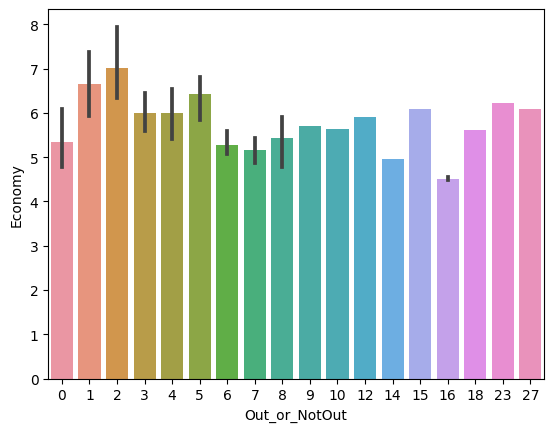

In [131]:
sns.barplot(data=All_Rounders_Data, x='Out_or_NotOut', y='Economy')